In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from pathlib import Path

# Helper functions
from helper_functions import get_images, prep_for_train

# Styles for miles
style.use('ggplot')

In [2]:
model_deepfake = keras.Sequential([
  layers.Conv2D(filters = 64, kernel_size = 4, strides = (1, 1), input_shape = (256, 256, 3), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters = 32, kernel_size = 4, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(filters = 16, kernel_size = 4, strides = (1, 1), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(units = 4096, activation = 'relu'),
  layers.Dropout(rate = 0.1),
  layers.Dense(units = 256, activation = 'relu'), 
  layers.Dense(units = 1, activation = 'softmax')
])

In [3]:
model_deepfake.compile(optimizer = SGD(lr=1e-6), 
                       metrics = [keras.metrics.BinaryAccuracy(), 
                                  keras.metrics.Precision(), 
                                  keras.metrics.Recall()],
                       loss = keras.losses.BinaryCrossentropy())

In [4]:
model_deepfake.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [5]:
# TRAIN THAT MODEL!
X, y = prep_for_train(get_images(200, seed=700))
model_fit = model_deepfake.fit(X, y, epochs=5, batch_size=100, validation_data=prep_for_train(get_images(1000, dtype='valid', seed=430)))

Epoch 1/5
2/2 [==============================] - 35s 26s/step - loss: 0.6941 - binary_accuracy: 0.4767 - precision: 0.4767 - recall: 1.0000 - val_loss: 0.6937 - val_binary_accuracy: 0.4995 - val_precision: 0.4995 - val_recall: 1.0000
Epoch 2/5
2/2 [==============================] - 32s 24s/step - loss: 0.6943 - binary_accuracy: 0.5100 - precision: 0.5100 - recall: 1.0000 - val_loss: 0.6937 - val_binary_accuracy: 0.4995 - val_precision: 0.4995 - val_recall: 1.0000
Epoch 3/5
2/2 [==============================] - 32s 24s/step - loss: 0.6922 - binary_accuracy: 0.5200 - precision: 0.5200 - recall: 1.0000 - val_loss: 0.6937 - val_binary_accuracy: 0.4995 - val_precision: 0.4995 - val_recall: 1.0000
Epoch 4/5
2/2 [==============================] - 34s 27s/step - loss: 0.6919 - binary_accuracy: 0.5067 - precision: 0.5067 - recall: 1.0000 - val_loss: 0.6937 - val_binary_accuracy: 0.4995 - val_precision: 0.4995 - val_recall: 1.0000
Epoch 5/5
2/2 [==============================] - 35s 26s/step - 

In [8]:
y.flatten()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [15]:
model_fit.history

{'loss': [0.6927696466445923,
  0.6944542527198792,
  0.6928955316543579,
  0.6924312114715576,
  0.693122386932373],
 'binary_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5],
 'precision': [0.5, 0.5, 0.5, 0.5, 0.5],
 'recall': [1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.6937080025672913,
  0.6937080025672913,
  0.6937080025672913,
  0.6937079429626465,
  0.6937079429626465],
 'val_binary_accuracy': [0.4994850754737854,
  0.4994850754737854,
  0.4994850754737854,
  0.4994850754737854,
  0.4994850754737854],
 'val_precision': [0.4994850754737854,
  0.4994850754737854,
  0.4994850754737854,
  0.4994850754737854,
  0.4994850754737854],
 'val_recall': [1.0, 1.0, 1.0, 1.0, 1.0]}

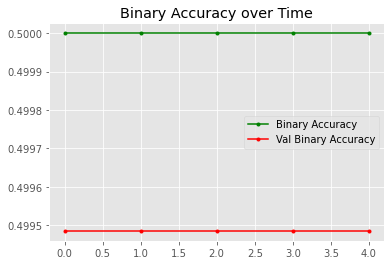

In [16]:
plt.plot(model_fit.history['binary_accuracy'], 'g.-', label = 'Binary Accuracy')
plt.plot(model_fit.history['val_binary_accuracy'], 'r.-', label = 'Val Binary Accuracy')
plt.legend()
plt.title('Binary Accuracy over Time')
plt.show()

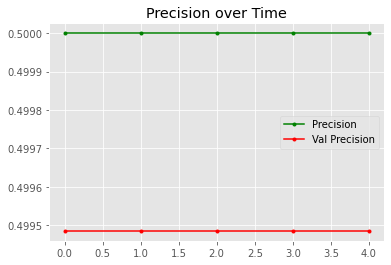

In [17]:
plt.plot(model_fit.history['precision'], 'g.-', label = 'Precision')
plt.plot(model_fit.history['val_precision'], 'r.-', label = 'Val Precision')
plt.legend()
plt.title('Precision over Time')
plt.show()